---
title: "10-单因素方差分析（ANOVA）"
author: "Simon Zhou"
date: "2025-05-07"
format: 
    html:
        code-fold: false
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

# 为什么只讲单因素方差分析

- 作为回归分析的“引子
- “单因素方差分析”与“单因素回归分析”是相同的
- “多因素方差分析”不如直接使用“多因素回归分析
- 回归分析中能更加方便的看两个变量是否存在交互作用(ANCOVA)

单因素方差分析（one-way ANOVA）也叫完全随机设计资料（completely randomized designe）的方差分析

## 方差分析的假设

- 假设1:y变量为连续变量
- 假设2:有一个包含2个及以上分类、且组别间相互独立的x变量
- 假设3:每组间和组内的观测值相互独立
- 假设4:每组内没有明显异常值
- 假设5:每组内y变量符合正态分布
- 假设6:进行方差齐性检验，观察每组的方差是否相等

总结为：**独立、正态、方差齐**

## 数据导入

In [ ]:
%%stata
webuse systolic,clear

(Systolic blood pressure data)


### 查看一下数据形式与结构

In [7]:
%%stata
list


     +---------------------------+
     | drug   disease   systolic |
     |---------------------------|
  1. |    1         1         42 |
  2. |    1         1         44 |
  3. |    1         1         36 |
  4. |    1         1         13 |
  5. |    1         1         19 |
     |---------------------------|
  6. |    1         1         22 |
  7. |    1         2         33 |
  8. |    1         2         26 |
  9. |    1         2         33 |
 10. |    1         2         21 |
     |---------------------------|
 11. |    1         3         31 |
 12. |    1         3         -3 |
 13. |    1         3         25 |
 14. |    1         3         25 |
 15. |    1         3         24 |
     |---------------------------|
 16. |    2         1         28 |
 17. |    2         1         23 |
 18. |    2         1         34 |
 19. |    2         1         42 |
 20. |    2         1         13 |
     |---------------------------|
 21. |    2         2         34 |
 22. |    2        

In [9]:
%%stata
codebook drug


-------------------------------------------------------------------------------
drug                                                                  Drug used
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/58

            Tabulation: Freq.  Value
                           15  1
                           15  2
                           12  3
                           16  4


In [10]:
%%stata
sum systolic,detail


                 Increment in systolic b.p.
-------------------------------------------------------------
      Percentiles      Smallest
 1%           -6             -6
 5%           -3             -5
10%            1             -3       Obs                  58
25%            9             -2       Sum of wgt.          58

50%           21                      Mean           18.87931
                        Largest       Std. dev.      12.80087
75%           28             36
90%           34             42       Variance       163.8624
95%           42             42       Skewness       -.094992
99%           44             44       Kurtosis        2.13251


## 假设4：每组内没有明显的异常值

最直观的方式就是用箱型图进行展示数据分布

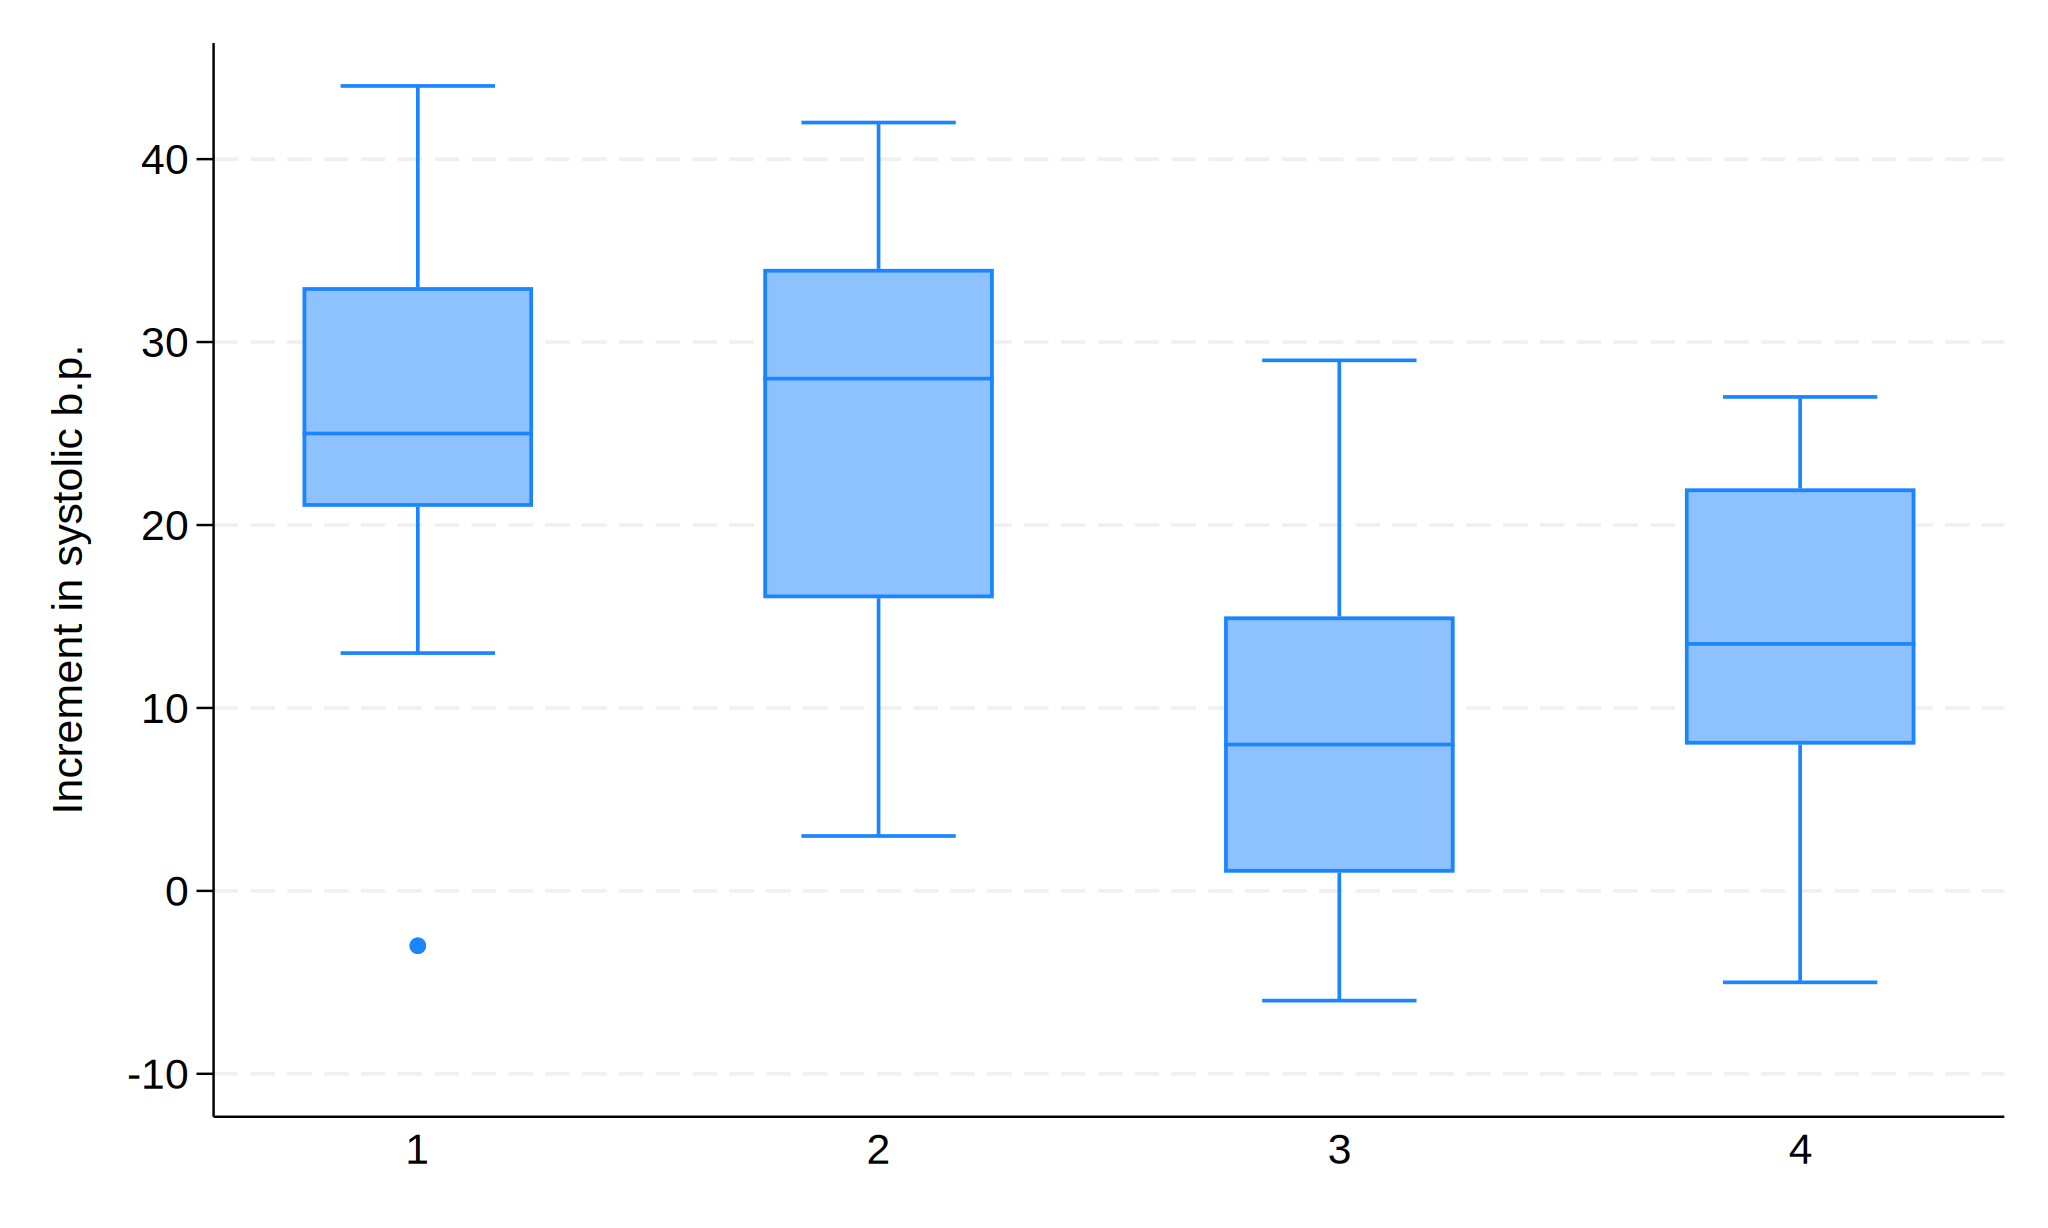

In [11]:
%%stata
graph box systolic,over(drug)

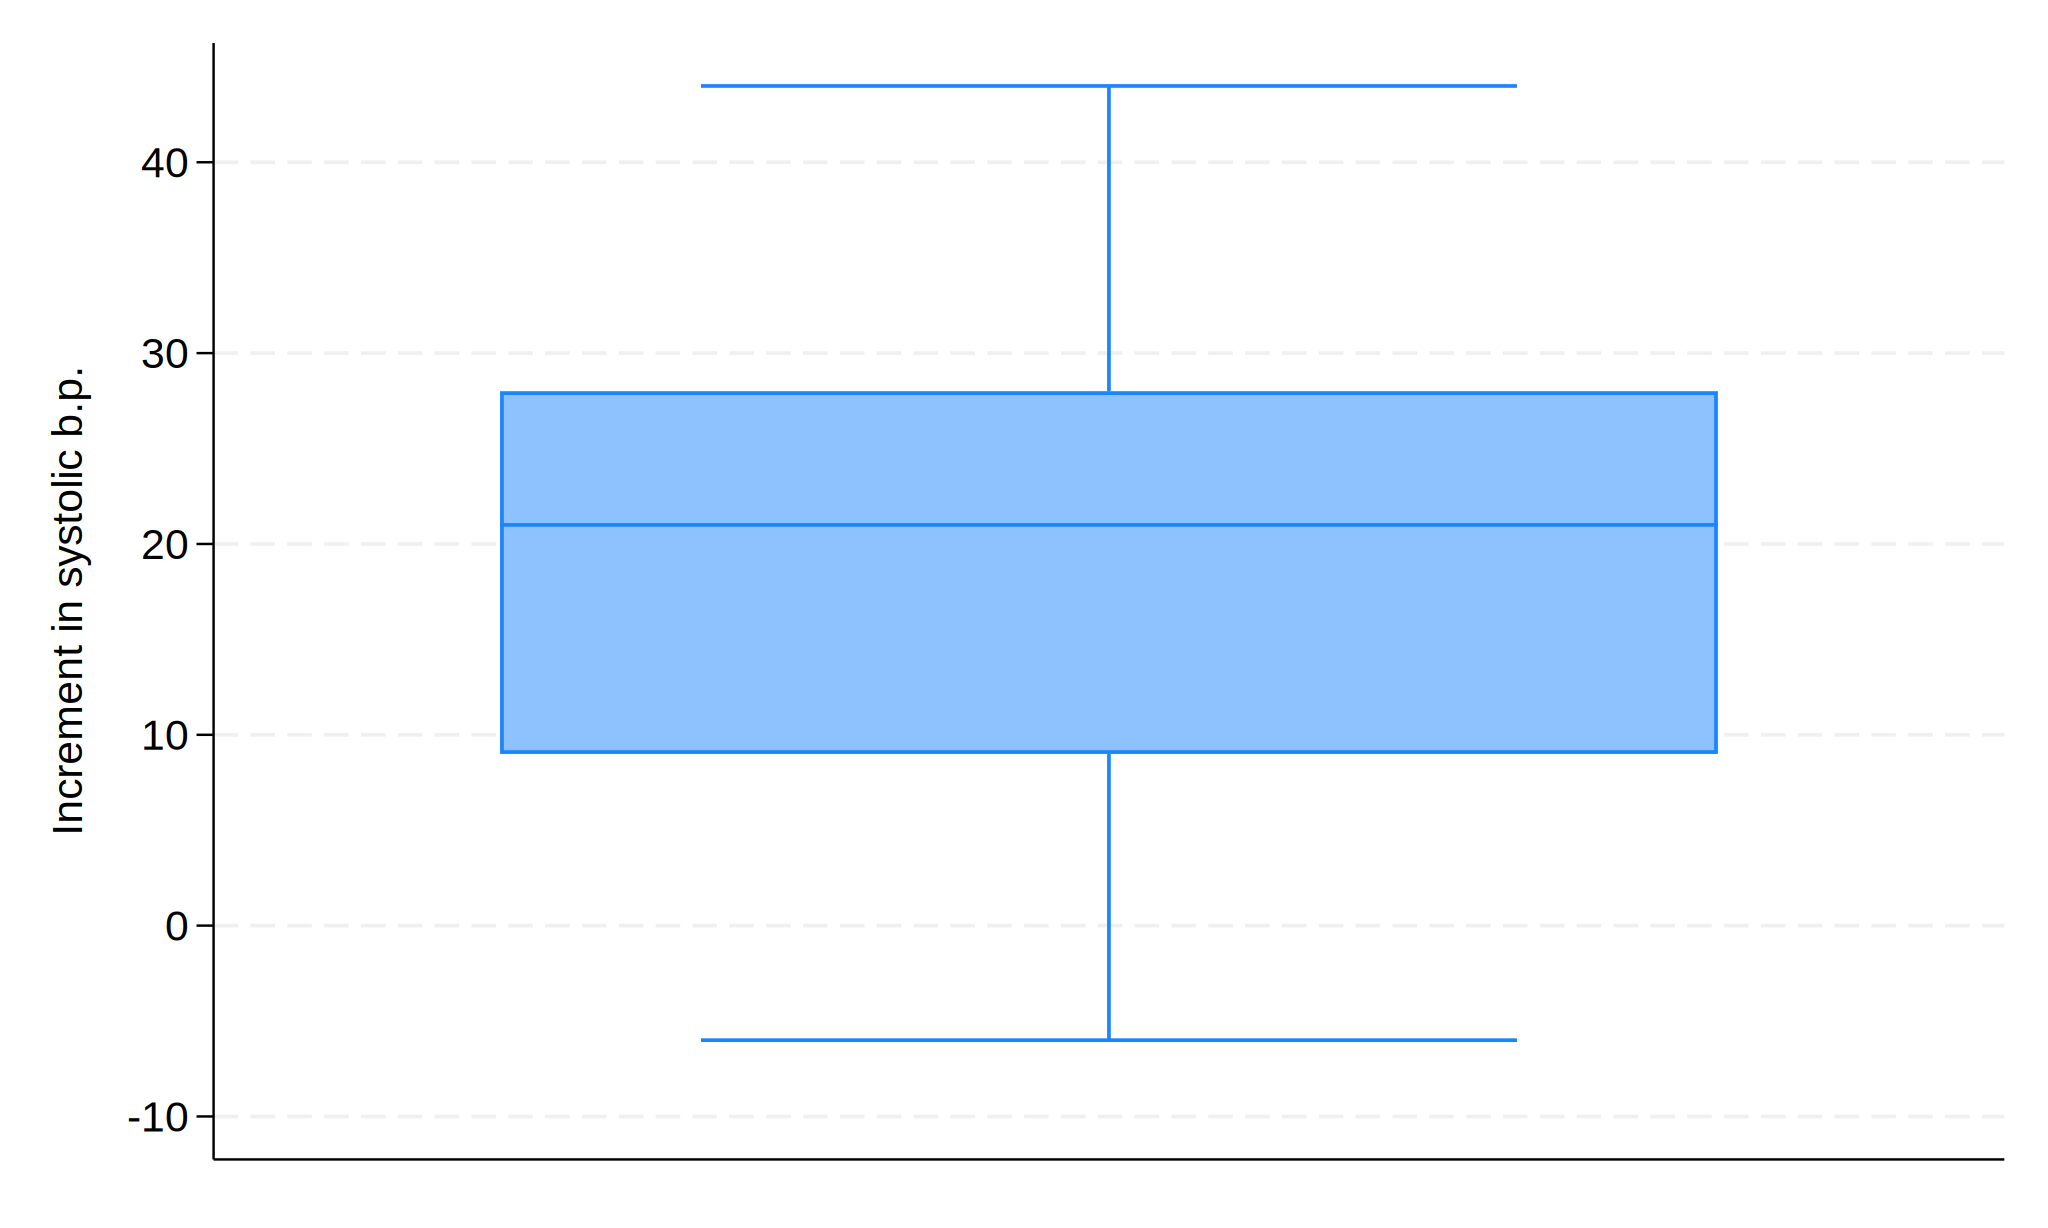

In [8]:
%%stata
graph box systolic

## 假设5：每组内y变量符合正态分布

一般使用下面三种方法中的一种检验正态性就可以，一般使用 `Shapiro-Wilk检验` 较为普遍。

### 偏度与峰度

使用 `sktest` 检验偏度与峰度，P值大于0.05，就不能说不符合正态分布

In [12]:
%%stata
sktest systolic


Skewness and kurtosis tests for normality
                                                         ----- Joint test -----
    Variable |       Obs   Pr(skewness)   Pr(kurtosis)   Adj chi2(2)  Prob>chi2
-------------+-----------------------------------------------------------------
    systolic |        58         0.7452         0.0529          4.03     0.1331


### Shapiro-Wilk W test

Shapiro-Wilk检验，是一种基于相关性的算法。计算可得到一个相关系数，它越接近1就越表明数据和正态分布拟合得越好。

它基于Shapiro和Wilk于1965年提出的检验统计量。以下是其基本原理和用途：

**基本原理：**

1. 零假设（Null Hypothesis）：Shapiro-Wilk检验的零假设是数据集来自于正态分布。这意味着，如果数据确实服从正态分布，则零假设成立。

2. 计算Shapiro-Wilk统计量：检验首先计算Shapiro-Wilk统计量，这是一个衡量数据与正态分布拟合的度量。该统计量基于数据的观察值和正态分布的期望值之间的差异。//Shapiro-Wilk检验的统计量（W统计量）是通过与理论正态分布的期望值进行比较来判断样本数据是否符合正态分布。Shapiro-Wilk检验的原假设是样本数据符合正态分布。统计量的计算基于样本数据的排序顺序和回归分析的概念。W统计量越接近1，表示样本数据越接近正态分布。

3. 与临界值比较：接下来，Shapiro-Wilk统计量与临界值进行比较。临界值是根据所选的显著性水平（通常为5%）和数据集的大小计算得出的。如果Shapiro-Wilk统计量小于临界值，就意味着数据不太可能来自于正态分布。

4. 做出决策：根据统计量与临界值的比较，可以决定是否拒绝零假设。如果统计量足够小，小于临界值，通常会拒绝零假设，这意味着数据不服从正态分布。否则，不能拒绝零假设，这表示数据可能服从正态分布。

**Notices：** Shapiro-Wilk正态性检验对检验样本大小有一定的要求。具体来说，Shapiro-Wilk检验在样本大小较小（通常小于大约50-200，具体取决于不同文献和实践）时可能不太适用，并且在这种情况下其效力可能会降低。

In [13]:
%%stata
swilk systolic


                   Shapiro–Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
    systolic |         58    0.97803      1.162     0.323    0.37331


**Shapiro-Francia test**

Shapiro-Francia检验是一种用于检验数据是否来自正态分布的统计方法。它是Shapiro-Wilk检验的一个变种，通常适用于小到中等样本大小的数据集。Shapiro-Francia检验的核心思想是通过计算统计量来评估数据的正态性。

Shapiro-Francia检验的零假设是数据来自正态分布，而备择假设是数据不来自正态分布。检验的结果会生成一个p-value，如果p-value较小（通常小于0.05），则通常会拒绝零假设，表明数据不符合正态分布。如果p-value较大，则无法拒绝零假设，表明数据可能来自正态分布。

这种检验方法对于小到中等样本大小的数据集通常效果良好，并且可以用于确定数据是否符合正态分布的假设。

虽然Shapiro-Francia检验在小样本中通常效果较好，但它也依赖于权重参数的准确性，因此在某些情况下可能不如其他正态性检验方法稳健。因此，在使用Shapiro-Francia检验时，应谨慎选择合适的样本大小和检验方法，以确保可靠的结果。

In [15]:
%%stata
sfrancia systolic


                  Shapiro–Francia W' test for normal data

    Variable |       Obs       W'          V'        z       Prob>z
-------------+-----------------------------------------------------
    systolic |        58    0.98522      0.866    -0.275    0.60824


## 单因素方差分析

语法：

```stata
oneway yvar xvar,[,option]
```

如果得到的 `Prob>F` 结果是 `>0.05` 则说明至少有两个组的平均值是有显著差别的。

`Prob>chi2 = ` 得到的结果如果 `>0.05` 则说明各组满足方差齐性。

In [16]:
%%stata
oneway systolic drug


                        Analysis of variance
    Source              SS         df      MS            F     Prob > F
------------------------------------------------------------------------
Between groups      3133.23851      3   1044.41284      9.09     0.0001
 Within groups      6206.91667     54   114.942901
------------------------------------------------------------------------
    Total           9340.15517     57   163.862371

Bartlett's equal-variances test: chi2(3) =   1.0063    Prob>chi2 = 0.800


### 使用两两比较

一般使用 `bonferroni` 比较

In [17]:
%%stata
oneway systolic drug, bonferroni 


                        Analysis of variance
    Source              SS         df      MS            F     Prob > F
------------------------------------------------------------------------
Between groups      3133.23851      3   1044.41284      9.09     0.0001
 Within groups      6206.91667     54   114.942901
------------------------------------------------------------------------
    Total           9340.15517     57   163.862371

Bartlett's equal-variances test: chi2(3) =   1.0063    Prob>chi2 = 0.800

            Comparison of Increment in systolic b.p. by Drug used
                                (Bonferroni)
Row Mean-|
Col Mean |          1          2          3
---------+---------------------------------
       2 |   -.533333
         |      1.000
         |
       3 |   -17.3167   -16.7833
         |      0.001      0.001
         |
       4 |   -12.5667   -12.0333       4.75
         |      0.012      0.017      1.000


In [18]:
%%stata
oneway systolic drug, bonferroni tab


            |  Summary of Increment in systolic
            |                b.p.
  Drug used |        Mean   Std. dev.       Freq.
------------+------------------------------------
          1 |   26.066667   11.677002          15
          2 |   25.533333    11.61813          15
          3 |        8.75     10.0193          12
          4 |        13.5   9.3238047          16
------------+------------------------------------
      Total |    18.87931   12.800874          58

                        Analysis of variance
    Source              SS         df      MS            F     Prob > F
------------------------------------------------------------------------
Between groups      3133.23851      3   1044.41284      9.09     0.0001
 Within groups      6206.91667     54   114.942901
------------------------------------------------------------------------
    Total           9340.15517     57   163.862371

Bartlett's equal-variances test: chi2(3) =   1.0063    Prob>chi2 = 0.800

    

# 多因素方差分析

语法：

```stata
anova yvar xvar1 xvar2,[,option]
```

In [19]:
%%stata
anova systolic drug disease


                         Number of obs =         58    R-squared     =  0.3803
                         Root MSE      =    10.5503    Adj R-squared =  0.3207

                  Source | Partial SS         df         MS        F    Prob>F
              -----------+----------------------------------------------------
                   Model |  3552.0722          5   710.41445      6.38  0.0001
                         |
                    drug |  3063.4329          3   1021.1443      9.17  0.0001
                 disease |  418.83374          2   209.41687      1.88  0.1626
                         |
                Residual |  5788.0829         52   111.30929  
              -----------+----------------------------------------------------
                   Total |  9340.1552         57   163.86237  
